In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import trackpy.predict
from scipy.misc import imsave
from scipy.misc import imread
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
shot = 232
picL = 18333
picR = 18158
FrameL = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picL))
FrameR = pims.ImageSequence('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/invframe/frame_*.tif'.format(shot,shot,picR))
#FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picL))
#FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_white_*.tif'.format(picR))
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

In [2]:
###################################
#Locate Features; single frame test
###################################
#init_index = 100
#f = tp.locate(FrameL[init_index], 3, minmass=5) 
#Show points located. It will be better to have more points rather than missing points.
#plt.figure(figsize=[12,12])  # make a new figure
#tp.annotate(f, FrameL[init_index]);

In [3]:
#Show 'mass' distribution
#fig, ax = plt.subplots()
#ax.hist(f['mass'], bins=20)
# Optionally, label the axes.
#ax.set(xlabel='mass', ylabel='count');
#plt.show()

In [4]:
######################################################################
#Locate Features; apply the same parameter to all frames
######################################################################
# Left frame
pred = trackpy.predict.NearestVelocityPredict()
#pred = trackpy.predict.ChannelPredict(0.5, 'x', minsamples=3)
fL = tp.batch(FrameL, 3, minmass=5);
tL = pred.link_df(fL, 3, memory=5)
tL.to_csv('./Data/Shot{}/trackL_frame_inv.csv'.format(shot))

Frame 4743: 6 trajectories present


In [5]:
#tL = pd.read_csv('./Data/Shot{}/trackL_frame_inv.csv'.formate(shot))
tL.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,83.176707,4.000000,58.738626,0.840730,0.528409,17.220561,157.0,0.0,0,0.0
1,137.871972,5.854671,68.174550,0.850402,0.368421,18.871848,162.0,0.0,0,1.0
2,276.000000,9.000000,30.194956,0.829156,0.454545,9.435924,66.0,0.0,0,2.0
3,135.000000,51.000000,23.825708,0.844317,0.402778,6.841045,44.0,0.0,0,3.0
4,45.995511,54.836139,210.185204,0.844870,0.344340,60.154015,542.0,0.0,0,4.0


In [6]:
#plt.figure(figsize=[12,12])
#tp.plot_traj(tL);

In [7]:
#plt.figure(figsize=[12,12])
#plt.imshow(v0L+bk0L)
#plt.scatter(tL['x'],tL['y'],s=0.3,c='g')
#plt.scatter(tL['x'],tL['y'],s=0.3,c=tL['mass'])
#plt.show()

In [8]:
# Remove tracks too few points (less than 500)
tL1 = tp.filter_stubs(tL,200)
#plt.figure(figsize=[12,12])
#tp.plot_traj(tL1);

In [9]:
#plt.figure(figsize=[12,12])
#plt.imshow(v0L)
#plt.scatter(tL1['x'],tL1['y'],s=0.3,c=tL1['mass'])
#plt.scatter(tL1['x'],tL1['y'],s=0.3,c='r')
#plt.show()

In [10]:
tL2 = tL1
range_limit = 10
Range = {}
for ii in tL2['particle'].unique():
    Track = tL2[tL2['particle']==ii]
    xmax = np.max(Track['x'])
    xmin = np.min(Track['x'])
    ymax = np.max(Track['y'])
    ymin = np.min(Track['y'])
    ra = math.sqrt((xmax-xmin)*(xmax-xmin)+(ymax-ymin)*(ymax-ymin))
    Range[ii] = ra

In [11]:
RANGE = []
for ii in range(len(tL2)):
    RANGE.append(Range[tL2['particle'].iloc[ii]])
    #print(ii,Range[tL2['particle'].iloc[ii]])

In [12]:
tL2['range'] = RANGE

In [13]:
tL2.head()

,x,y,mass,size,ecc,signal,raw_mass,ep,frame,particle,range
frame,,,,,,,,,,,
0,83.176707,4.000000,58.738626,0.840730,0.528409,17.220561,157.0,0.0,0,0.0,146.441840
0,137.871972,5.854671,68.174550,0.850402,0.368421,18.871848,162.0,0.0,0,1.0,159.966982
0,276.000000,9.000000,30.194956,0.829156,0.454545,9.435924,66.0,0.0,0,2.0,8.608093
0,135.000000,51.000000,23.825708,0.844317,0.402778,6.841045,44.0,0.0,0,3.0,80.133718
0,45.995511,54.836139,210.185204,0.844870,0.344340,60.154015,542.0,0.0,0,4.0,85.768837


In [14]:
tL3 = tL2[tL2['range']>20]
tL3.to_csv('./Data/Shot{}/trackL3_frame_inv.csv'.format(shot))

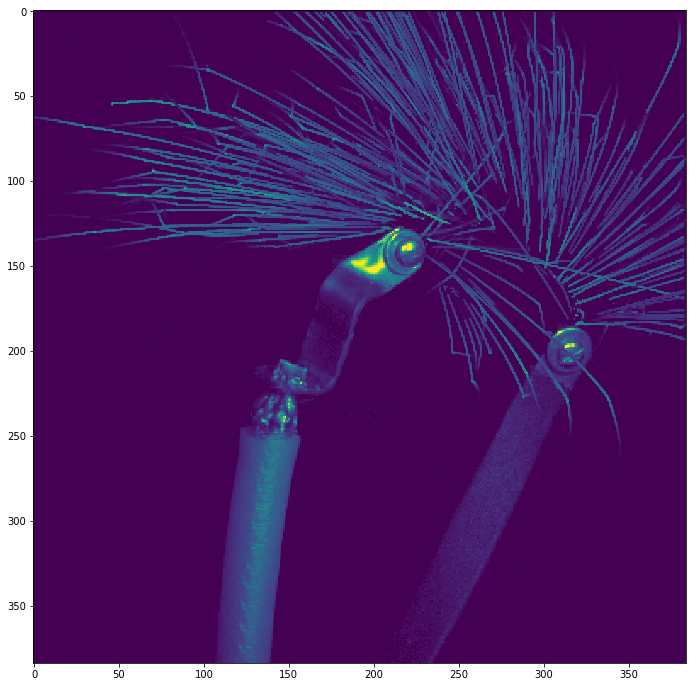

In [15]:
plt.figure(figsize=[6,6])
plt.imshow(v0L+bk0L)
plt.scatter(tL3['x'],tL3['y'],s=0.3,c=tL3['mass'])
#plt.scatter(tL3['x'],tL3['y'],s=0.1,c='g')
plt.savefig('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/sumTrackL{}.tif'.format(shot,shot,picL,shot))
plt.show()

In [11]:
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
tL4=pd.read_csv('./Data/Shot{}/trackL3_frame_inv.csv'.format(shot))

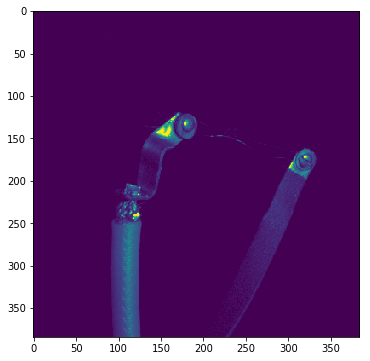

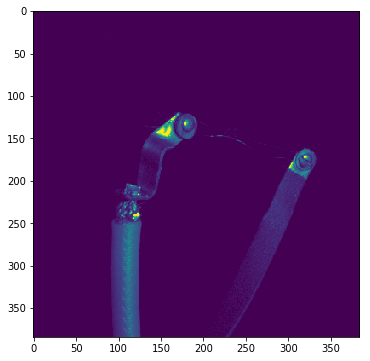

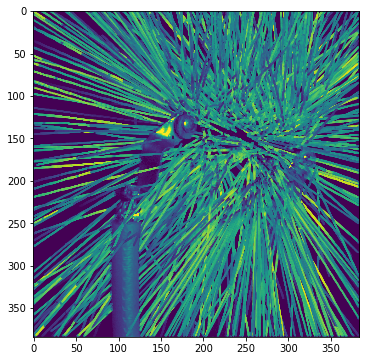

In [14]:
plt.figure(figsize=[6,6])
plt.imshow(bk0L)
plt.scatter(tL4['x'],tL4['y'],s=0.3,c=tL4['mass'])
#plt.scatter(tL3['x'],tL3['y'],s=0.1,c='g')
plt.savefig('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/sumTrackL{}.tif'.format(shot,shot,picL,shot))
plt.show()

In [18]:
#tL3.head()